In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("/content/uber.csv")

In [ ]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
data.shape

(200000, 9)

In [ ]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
data = data.drop(['Unnamed: 0', 'key'], axis=1)

In [ ]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
data['months'] = data['pickup_datetime']
data['hours'] = data['pickup_datetime']
data['months'] = data['months'].str.slice(start=5,stop=7)
data['hours'] = data['hours'].str.slice(start=11, stop=13)

In [ ]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,months,hours
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [ ]:
data = data.drop('pickup_datetime', axis=1)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,months,hours
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,17
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,03,01
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,06,00
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,05,14


In [ ]:
# Alternate to datetime separation
# df = pd.read_csv("/content/uber.csv")
# df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# df['hour'] = df['pickup_datetime'].dt.hour
# df['day'] = df['pickup_datetime'].dt.dayofweek
# df['month'] = df['pickup_datetime'].dt.month
# df = df.drop(columns=['pickup_datetime'])
# df

In [ ]:
data.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0
months,0
hours,0


In [ ]:
data['dropoff_latitude'] = data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean())
data['dropoff_longitude'] = data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean())
data.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
months,0
hours,0


In [ ]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
data.replace(to_replace=0, value = data['passenger_count'].mean(), inplace=True)
data[data['fare_amount']<=0] = data['fare_amount'].mean()
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.362407,-72.488497,39.965242,-72.486713,39.953240,1.691287
std,9.896653,11.666136,7.562049,13.314895,6.614871,1.385145
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734785,-73.991407,40.733817,1.000000
50%,8.500000,-73.981821,40.752590,-73.980091,40.753040,1.000000
75%,12.500000,-73.967148,40.767157,-73.963653,40.767999,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


,0
fare_amount,"Axes(0.125,0.77;0.352273x0.11)"
pickup_longitude,"Axes(0.547727,0.77;0.352273x0.11)"
pickup_latitude,"Axes(0.125,0.638;0.352273x0.11)"
dropoff_longitude,"Axes(0.547727,0.638;0.352273x0.11)"
dropoff_latitude,"Axes(0.125,0.506;0.352273x0.11)"
passenger_count,"Axes(0.547727,0.506;0.352273x0.11)"


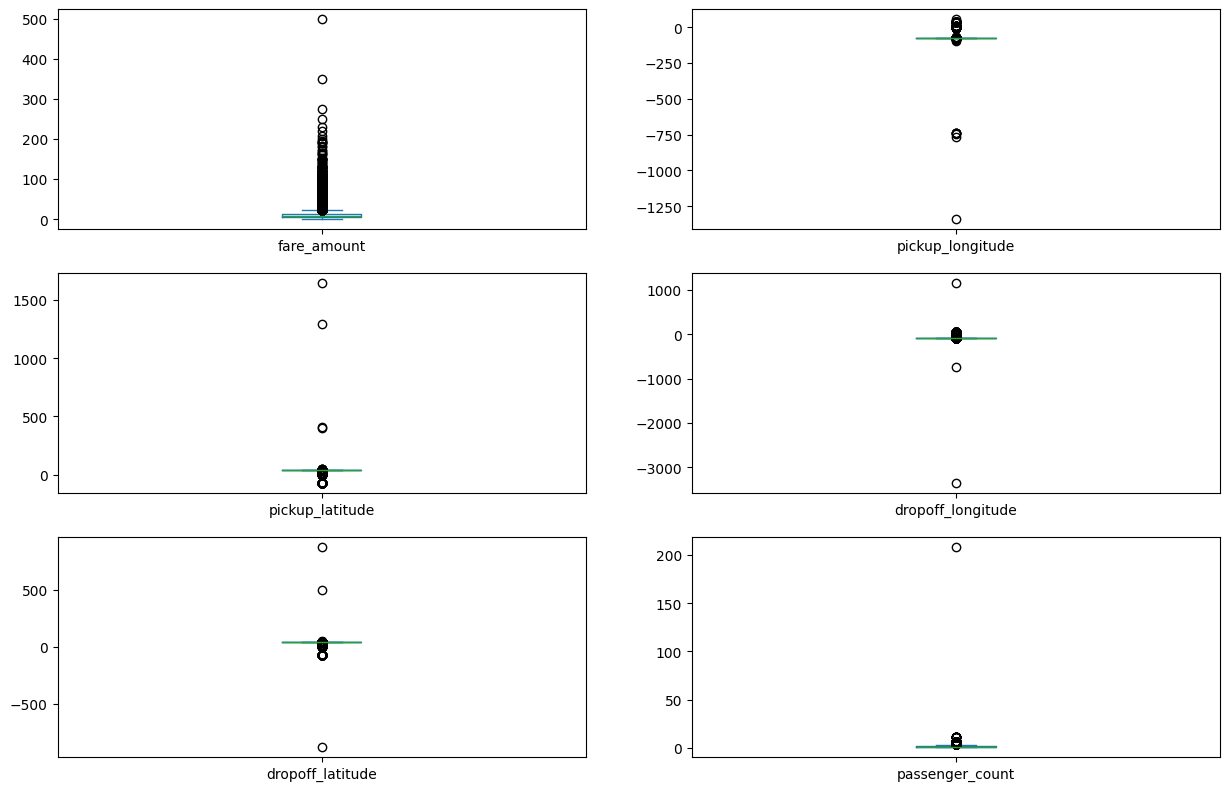

In [ ]:
data.plot(kind="box", subplots=True, layout=(6,2), figsize=(15,20))

In [ ]:
def remove_outlier(df1, col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3-Q1
  lb = Q1 - 1.5*IQR
  ub = Q3 + 1.5*IQR
  data[col] = np.clip(df1[col], lb, ub)
  return df1

def treat_outliers_all(df1, colslist):
  for col in colslist:
    remove_outlier(df1, col)
  return df1

In [ ]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'months',
       'hours'],
      dtype='object')

In [ ]:
cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
treat_outliers_all(data, cols)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,months,hours
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,05,19
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,07,20
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,08,21
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,06,08
4,16.00,-73.929772,40.744085,-73.973082,40.761247,3.5,08,17
...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,10
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,03,01
199997,22.25,-73.986017,40.756487,-73.922022,40.692588,2.0,06,00
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,05,14


,0
fare_amount,"Axes(0.125,0.77;0.352273x0.11)"
pickup_longitude,"Axes(0.547727,0.77;0.352273x0.11)"
pickup_latitude,"Axes(0.125,0.638;0.352273x0.11)"
dropoff_longitude,"Axes(0.547727,0.638;0.352273x0.11)"
dropoff_latitude,"Axes(0.125,0.506;0.352273x0.11)"
passenger_count,"Axes(0.547727,0.506;0.352273x0.11)"


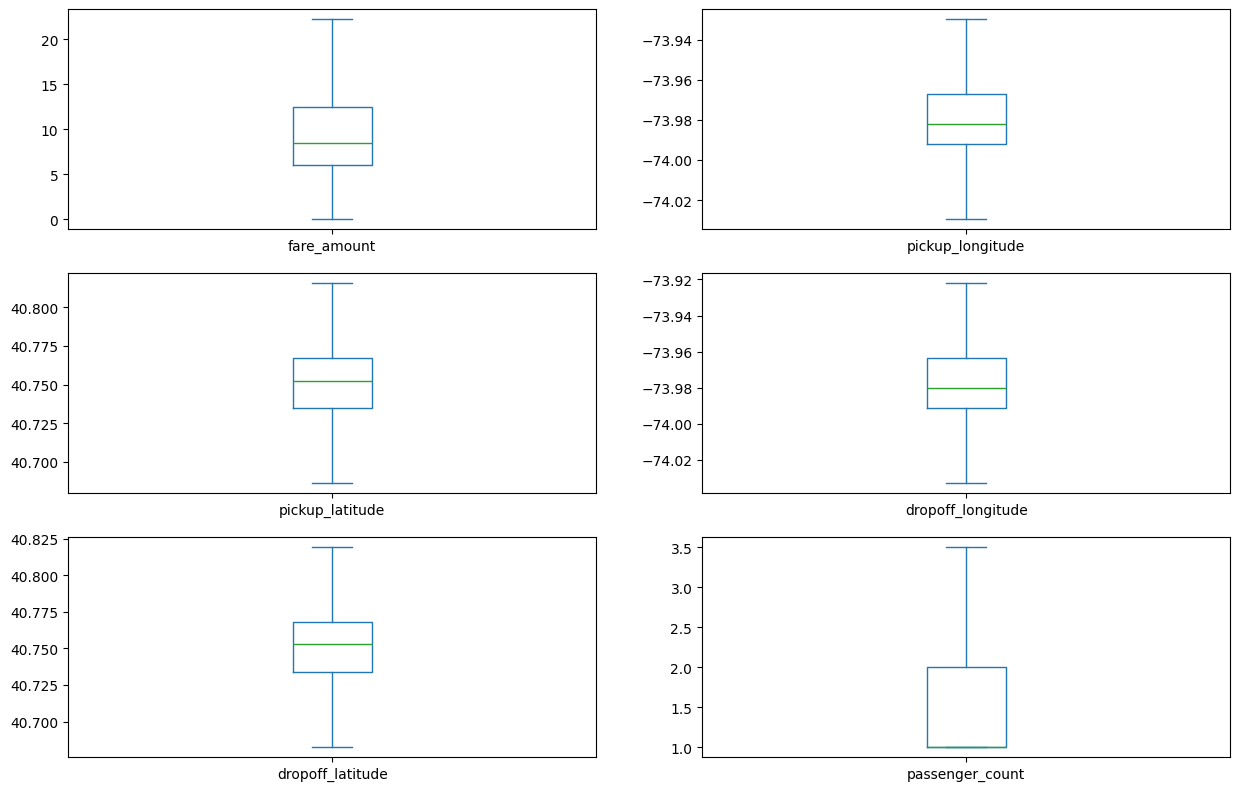

In [ ]:
data.plot(kind="box", subplots=True, layout=(6,2), figsize=(15,20))

In [ ]:
data.shape

(200000, 8)

In [ ]:
data.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
months,0
hours,0


Text(0, 0.5, 'fare_amount')

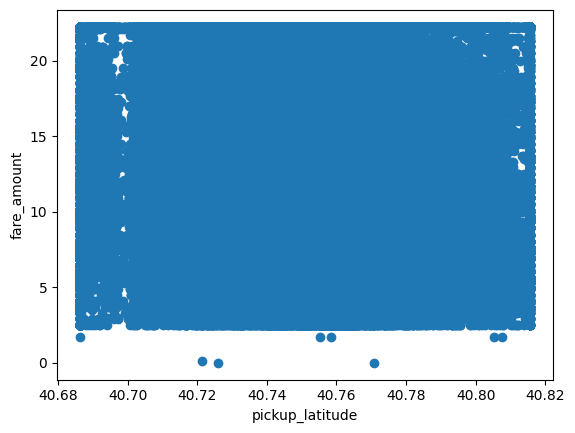

In [ ]:
plt.scatter(data['pickup_latitude'],data['fare_amount'])
plt.xlabel("pickup_latitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

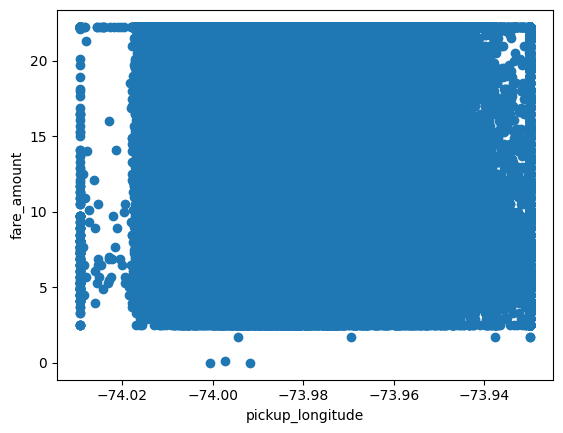

In [ ]:
plt.scatter(data['pickup_longitude'],data['fare_amount'])
plt.xlabel("pickup_longitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

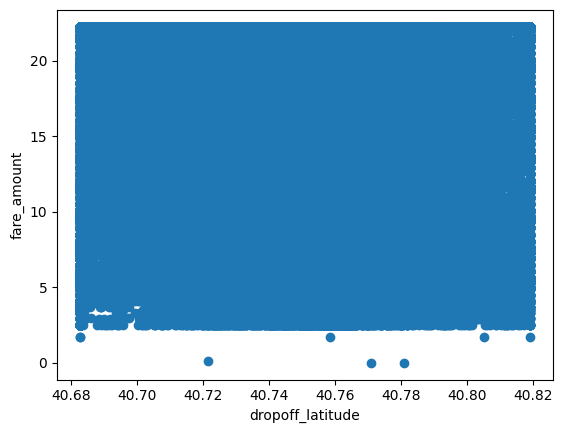

In [ ]:
plt.scatter(data['dropoff_latitude'],data['fare_amount'])
plt.xlabel("dropoff_latitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

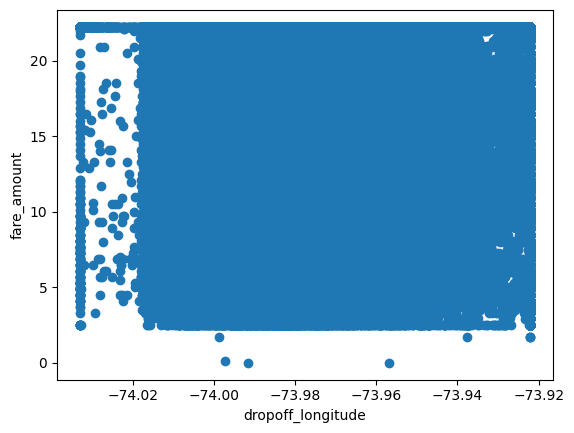

In [ ]:
plt.scatter(data['dropoff_longitude'],data['fare_amount'])
plt.xlabel("dropoff_longitude")
plt.ylabel("fare_amount")

In [ ]:
corr_matrix = data.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,months,hours
fare_amount,1.000000,0.154189,-0.110927,0.218764,-0.125988,0.014649,0.030658,-0.023619
pickup_longitude,0.154189,1.000000,0.258704,0.425930,0.072689,-0.012819,0.001483,0.011517
pickup_latitude,-0.110927,0.258704,1.000000,0.048264,0.515985,-0.013306,0.001252,0.029740
dropoff_longitude,0.218764,0.425930,0.048264,1.000000,0.244958,-0.008774,0.002689,-0.046666
dropoff_latitude,-0.125988,0.072689,0.515985,0.244958,1.000000,-0.006609,-0.001492,0.019840
passenger_count,0.014649,-0.012819,-0.013306,-0.008774,-0.006609,1.000000,0.009978,0.019967
months,0.030658,0.001483,0.001252,0.002689,-0.001492,0.009978,1.000000,-0.003946
hours,-0.023619,0.011517,0.029740,-0.046666,0.019840,0.019967,-0.003946,1.000000


<Axes: >

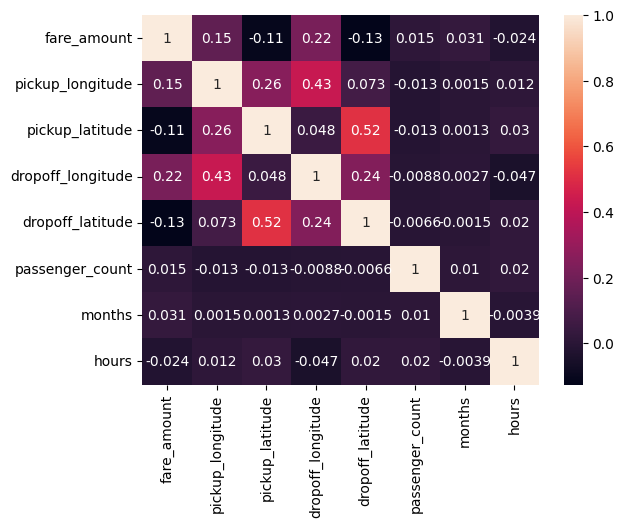

In [ ]:
sns.heatmap(corr_matrix, annot=True)

In [ ]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'months',
       'hours'],
      dtype='object')

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

# OR
# features = ['pickup_longitude', 'pickup_latitude',
#             'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'month', 'day']
# X = df[features]
# y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(170000, 7) (170000,) (30000, 7) (30000,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.09043918914186033

In [ ]:
y_pred = lr.predict(X_test)
result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result.sample(10)

,Actual,Predicted
8954,13.3,9.116191
157656,20.5,9.158251
130669,6.5,8.696884
54594,15.5,17.155805
140110,4.9,8.688383
168660,10.1,8.854338
145999,13.3,9.656297
119965,6.1,10.195023
47902,7.0,10.297008
150191,8.5,10.652883


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 4.139260753191438
Mean Squared Error: 26.97078757557383
Root Mean Squared Error: 5.193340695118493
R Squared (R²): 0.3007310910794897


In [ ]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.7429176784574569

In [ ]:
y_pred = rf.predict(X_test)
result1 = pd.DataFrame()
result1['Actual'], result1['Predicted'] = y_test, y_pred
result1.sample(10)

,Actual,Predicted
132567,18.00,16.75
78252,3.70,4.97
178539,8.50,11.26
46768,5.00,5.14
179573,8.00,8.01
191713,18.50,12.18
74152,12.50,12.59
139365,7.00,5.48
193796,8.00,8.17
104168,22.25,5.81


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.7868154799458227
Mean Squared Error: 7.6231436106153
Root Mean Squared Error: 2.761004094639358
R Squared (R²): 0.8619267245290965
